In [323]:
import matplotlib.pyplot as plt
import random
import math

In [324]:
coords = []
x = []
y = []
for i in range(0, 100):
    x.append(random.randint(-256,256))
    y.append(random.randint(-256,256))
coords.append(x)
coords.append(y)



In [325]:
class QuadTree:
    def __init__(self,l,r,t,b,level):
        self.level = level
        self._00_ = None
        self._01_ = None
        self._10_ = None
        self._11_ = None
        self.quads = [self._00_,self._01_,self._10_,self._11_]
        self.l = l
        self.r = r
        self.t = t
        self.b = b
        self.x = (self.l + self.r)/2
        self.y = (self.t + self.b)/2

    def genQuad(self):
        if self.level <= 4:
            self._00_ = QuadTree(self.l,self.x,self.t,self.y,self.level+1)        # 0 --> l, 1 --> x, 2 --> l, 3 --> x      quad%2*self.x + (quad+1)%2*self.l
            self._01_ = QuadTree(self.x,self.r,self.t,self.y,self.level+1)        # quad%2*self.x + (quad+1)%2*self.l, quad%2*self.r + (quad+1)%2*self.x, quad//2*self.y + (quad//2+1)%2*self.t, quad//2*self.b + (quad//2+1)%2*self.y
            self._10_ = QuadTree(self.l,self.x,self.y,self.b,self.level+1)        # quad//2*self.y + (quad//2+1)%2*self.t, quad//2*self.b + (quad//2+1)%2*self.y
            self._11_ = QuadTree(self.x,self.r,self.y,self.b,self.level+1)
        else:
            self._00_ = leaf(self.l,self.x,self.t,self.y)
            self._01_ = leaf(self.x,self.r,self.t,self.y)
            self._10_ = leaf(self.l,self.x,self.y,self.b)
            self._11_ = leaf(self.x,self.r,self.y,self.b)


    def __repr__(self):
        return f"level:{self.level}\t\t{self.t}  ^\t\t\n|{self.l}<--\t({self.x},{self.y})\t-->{self.r}|\n\t\t{self.b}  v\t\t"
    
    def _print_(self):
        print(self)
        if self._00_:
            self._00_._print_()
        if self._01_:
            self._01_._print_()
        if self._10_:
            self._10_._print_()
        if self._11_:
            self._11_._print_()

    def _isInQuad_(self,coords):
        if coords[0] >= self.l and coords[0] < self.r:
            if coords[1] >= self.b and coords[1] < self.t:
                return True
            else:
                return False
        else:
            return False
    
    def tmp_inQuad(self,coords):
        if coords[0] >= self.l and coords[0] < self.x:
            if coords[1] <= self.t and coords[1] > self.y:
                return 0
            if coords[1] <= self.y and coords[1] >= self.b:
                return 2
        if coords[0] >= self.x and coords[0] <= self.r:
            if coords[1] <= self.t and coords[1] > self.y:
                return 1
            if coords[1] <= self.y and coords[1] >= self.b:
                return 3
        return -1

    def _insert_(self,coords):
        if self._00_ == None:
            self.genQuad()
        if self._00_._isInQuad_(coords):
            if type(self._00_) == leaf:
                self._00_._insert(coords)
            else:
                self._00_._insert_(coords)
        elif self._01_._isInQuad_(coords):
            if type(self._01_) == leaf:
                self._01_._insert(coords)
            else:
                self._01_._insert_(coords)
        elif self._10_._isInQuad_(coords):
            if type(self._10_) == leaf:
                self._10_._insert(coords)
            else:
                self._10_._insert_(coords)
        elif self._11_._isInQuad_(coords):
            if type(self._11_) == leaf:
                self._11_._insert(coords)
            else:
                self._11_._insert_(coords)
    
    def tmp_insert(self,coords):
        print(f"coords:{coords[0]},{coords[1]}")
        quad = self.tmp_inQuad(coords)
        print(quad)
        if self.quads[quad] == None:
            if self.level <= 4:
                print(f"level:{self.level}")
                self.quads[quad] = QuadTree(quad%2*self.x + (quad+1)%2*self.l, quad%2*self.r + (quad+1)%2*self.x, quad//2*self.y + (quad//2+1)%2*self.t, quad//2*self.b + (quad//2+1)%2*self.y,self.level+1)
                print(self.quads[quad])
                self.quads[quad].tmp_insert(coords)
            else:
                self.quads[quad] = leaf(quad%2*self.x + (quad+1)%2*self.l, quad%2*self.r + (quad+1)%2*self.x, quad//2*self.y + (quad//2+1)%2*self.t, quad//2*self.b + (quad//2+1)%2*self.y)
                self.quads[quad]._insert(coords)
        else:
            if type(self.quads[quad]) == leaf:
                self.quads[quad]._insert(coords)
            else:
                self.quads[quad].tmp_insert(coords)


    def _plot(self):
        plt.plot([self.l,self.r,self.r,self.l,self.l],[self.t,self.t,self.b,self.b,self.t], color='black', linewidth=0.5)
        plt.plot([self.l,self.r],[self.y,self.y], color='black',linewidth=0.5)
        plt.plot([self.x,self.x],[self.t,self.b], color='black', linewidth=0.5)

        if self._00_:
            self._00_._plot()
        if self._01_:
            self._01_._plot()
        if self._10_:
            self._10_._plot()
        if self._11_:
            self._11_._plot()
        
        if self.quads[0]:
            self.quads[0]._plot()
        if self.quads[1]:
            self.quads[1]._plot()
        if self.quads[2]:
            self.quads[2]._plot()
        if self.quads[3]:
            self.quads[3]._plot()


class leaf:
    def __init__(self,l,r,t,b):
        self.arr = []
        self.l = l
        self.r = r
        self.t = t
        self.b = b
        self.x = (self.l + self.r)/2
        self.y = (self.t + self.b)/2

    def _insert(self,coords):
        self.arr.append(coords)
    
    def _isInQuad_(self,coords):
        if coords[0] >= self.l and coords[0] < self.r:
            if coords[1] >= self.b and coords[1] < self.t:
                return True
            else:
                return False
        else:
            return False
    
    def _plot(self):
        plt.plot([self.l,self.r,self.r,self.l,self.l],[self.t,self.t,self.b,self.b,self.t], color='green', linewidth=0.5)
        # plt.plot([self.l,self.r],[self.y,self.y], color='green', linewidth=0.5)
        # plt.plot([self.x,self.x],[self.t,self.b], color='green', linewidth=0.5)
    
    def __repr__(self):
        return f"level:leaf\t\t{self.t}  ^\t\t\n|{self.l}<--\t({self.x},{self.y})\t-->{self.r}|\n\t\t{self.b}  v\t\t"
    def _print_(self):
        print(self)

coords:-91,95
0
level:0
level:1		256.0  ^		
|-256.0<--	(-128.0,128.0)	-->0.0|
		0.0  v		
coords:-91,95
3
level:1
level:2		128.0  ^		
|-128.0<--	(-64.0,64.0)	-->0.0|
		0.0  v		
coords:-91,95
0
level:2
level:3		128.0  ^		
|-128.0<--	(-96.0,96.0)	-->-64.0|
		64.0  v		
coords:-91,95
3
level:3
level:4		96.0  ^		
|-96.0<--	(-80.0,80.0)	-->-64.0|
		64.0  v		
coords:-91,95
0
level:4
level:5		96.0  ^		
|-96.0<--	(-88.0,88.0)	-->-80.0|
		80.0  v		
coords:-91,95
0
coords:209,-15
3
level:0
level:1		0.0  ^		
|0.0<--	(128.0,-128.0)	-->256.0|
		-256.0  v		
coords:209,-15
1
level:1
level:2		0.0  ^		
|128.0<--	(192.0,-64.0)	-->256.0|
		-128.0  v		
coords:209,-15
1
level:2
level:3		0.0  ^		
|192.0<--	(224.0,-32.0)	-->256.0|
		-64.0  v		
coords:209,-15
0
level:3
level:4		0.0  ^		
|192.0<--	(208.0,-16.0)	-->224.0|
		-32.0  v		
coords:209,-15
1
level:4
level:5		0.0  ^		
|208.0<--	(216.0,-8.0)	-->224.0|
		-16.0  v		
coords:209,-15
2
coords:195,209
1
level:0
level:1		256.0  ^		
|0.0<--	(128.0,128.0)	-->256.0

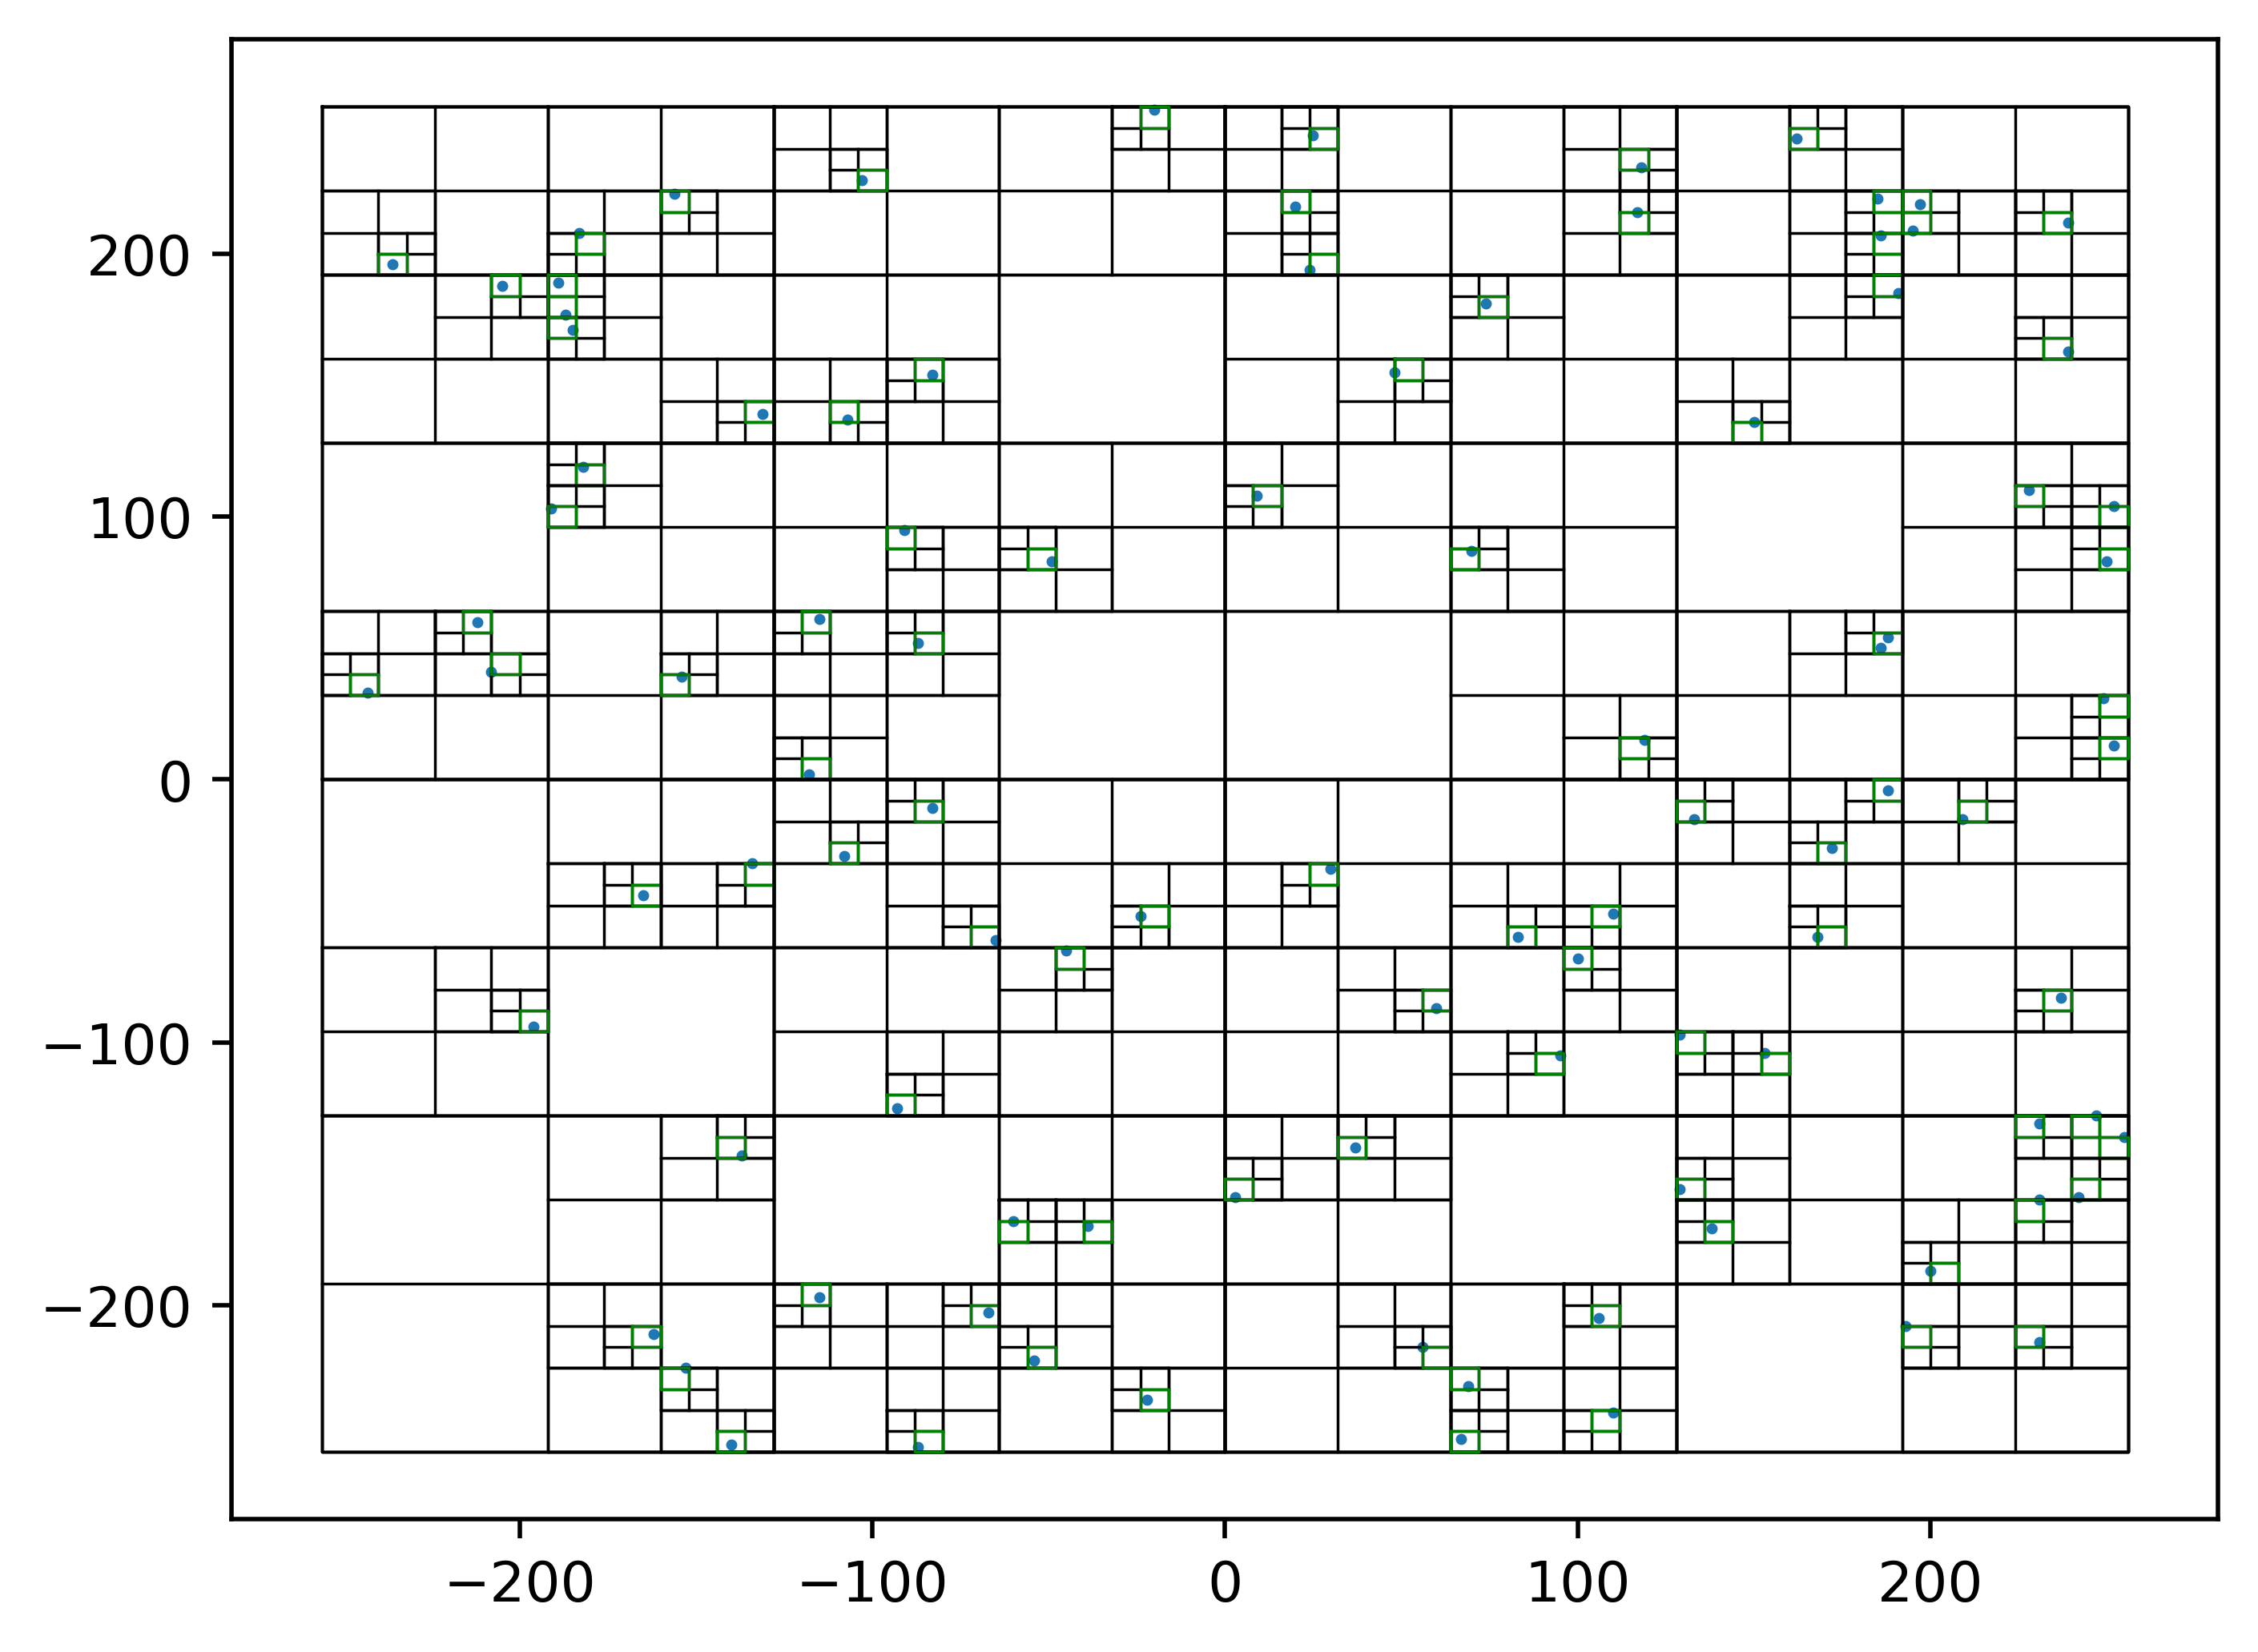

In [326]:
plt.figure(dpi=500)


q = QuadTree(-256,256,256,-256,0)
for i in range(len(coords[0])):
    q.tmp_insert([coords[0][i],coords[1][i]])
plt.scatter(x,y,s=1)

# x1 = [-50,50,-200]
# y1 = [50,50,200]
# c1 = []
# c1.append(x1)
# c1.append(y1)

# for i in range(len(c1[0])):
#     q.tmp_insert([c1[0][i],c1[1][i]])
# plt.scatter(x1,y1)

q._plot()
plt.show()


In [327]:
print(q.quads[0])

level:1		256.0  ^		
|-256.0<--	(-128.0,128.0)	-->0.0|
		0.0  v		


In [328]:
p = QuadTree(-100,100,100,-100,0)

In [329]:
p.tmp_inQuad([-50,50])

0

In [330]:
p.x < 50

True